In [192]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [193]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [194]:
!pip install mlxtend
!pip install onnxmltools
!pip install onnxruntime

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [196]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [197]:
!pip install skl2onnx

In [198]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [199]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [200]:
%pip install tensorflow
from tensorflow import feature_column
import tensorflow as tf
# Use tf.keras.layers instead of direct import (more compatible across TF versions)

Note: you may need to restart the kernel to use updated packages.


In [201]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 32
learning_rate = 0.001 ## 0.001
N_Epochs      = 1000

epsilon = 0.0001

In [202]:
path_data = './petfinder-mini.csv'

pet_raw_data = pd.read_csv( path_data, delimiter="," )

In [203]:
pet_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [204]:
pet_raw_data

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,been at my place for a while..am hoping to fin...,0,4
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1 month old white + grey kitten for adoption n...,1,3
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,ooooo,1,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,she is very shy..adventures and independent..s...,3,4


In [205]:
pd = pet_raw_data.to_numpy()
print(np.unique(pd[:,2]).size)

166


In [206]:
# In the original dataset "4" indicates the pet was not adopted.
#pet_raw_data['target'] = np.where(pet_raw_data['AdoptionSpeed']==4, 0, 1)

# Drop un-used columns.
#pet_data = pet_raw_data.drop(columns=['AdoptionSpeed', 'Description'])

headers_list = pet_raw_data.columns.values.tolist()

In [207]:
headers_list

['Type',
 'Age',
 'Breed1',
 'Gender',
 'Color1',
 'Color2',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Sterilized',
 'Health',
 'Fee',
 'Description',
 'PhotoAmt',
 'AdoptionSpeed']

In [208]:
# 1) Create binary target: 0 = not adopted (AdoptionSpeed == 4), 1 = adopted

pet_raw_data['target'] = np.where(pet_raw_data['AdoptionSpeed'] == 4, 0, 1)

# 2) Drop unused text column and original target source
pet_raw_data = pet_raw_data.drop(columns=['AdoptionSpeed', 'Description'])

In [209]:
headers_list = pet_raw_data.columns.values.tolist()

In [210]:
pet_raw_data

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,1
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,1
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,1
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,1
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,0


In [211]:
# Apply transformations to pet_raw_data
# Keep only specified columns and apply encodings

import pandas as pd
import numpy as np

# Start with a copy of pet_raw_data
pet_data_transformed = pet_raw_data.copy()

# Define the columns to keep (excluding Description and AdoptionSpeed, using target instead)
columns_to_keep = ['Type', 'Age', 'Breed1', 'Gender', 'Color1', 'Color2', 
                   'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 
                   'Health', 'Fee', 'PhotoAmt', 'target']

# Keep only the specified columns
pet_data_transformed = pet_data_transformed[columns_to_keep]

# 1. Age: Bucketize into 0,1,2,3,4,5 based on age_labels
age_labels = ['<=1', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '>5']
age_boundaries = [1, 2, 3, 4, 5]
pet_data_transformed['Age'] = pd.cut(
    pet_data_transformed['Age'], 
    bins=[-np.inf] + age_boundaries + [np.inf],
    labels=[0, 1, 2, 3, 4, 5]
).astype(int)

# 2. Gender: 0 or 1 (Male=0, Female=1)
if 'Gender' in pet_data_transformed.columns:
    pet_data_transformed['Gender'] = (pet_data_transformed['Gender'] == 'Female').astype(int)
    print("Gender encoded: Male=0, Female=1")

# 2b. Type: 0 or 1 (Cat=0, Dog=1)
if 'Type' in pet_data_transformed.columns:
    pet_data_transformed['Type'] = (pet_data_transformed['Type'] == 'Dog').astype(int)
    print("Type encoded: Cat=0, Dog=1")

# 3. Breed1: Label encode to 0,1,2,...
if 'Breed1' in pet_data_transformed.columns:
    pet_data_transformed['Breed1'], breed_labels = pd.factorize(pet_data_transformed['Breed1'])
    print(f"Breed1 encoded: {len(breed_labels)} unique breeds -> indices 0 to {len(breed_labels)-1}")

# 4. Vaccinated: 0 or 1 (No/Not Sure=0, Yes=1)
if 'Vaccinated' in pet_data_transformed.columns:
    pet_data_transformed['Vaccinated'] = (pet_data_transformed['Vaccinated'] == 'Yes').astype(int)
    print("Vaccinated encoded: No/Not Sure=0, Yes=1")

# 5. Label encode other categorical columns: Color1, Color2, MaturitySize, FurLength, Health, Sterilized
label_encode_columns = ['Color1', 'Color2', 'MaturitySize', 'FurLength', 'Health', 'Sterilized']

for col_name in label_encode_columns:
    if col_name in pet_data_transformed.columns:
        pet_data_transformed[col_name], unique_labels = pd.factorize(pet_data_transformed[col_name])
        print(f"{col_name} encoded: {len(unique_labels)} unique values -> {list(unique_labels)}")

# Display info about the transformed dataset
print("\n" + "="*50)
print("Transformation Summary:")
print("="*50)
print(f"Original pet_raw_data shape: {pet_raw_data.shape}")
print(f"Transformed pet_data_transformed shape: {pet_data_transformed.shape}")
print(f"\nColumns in final dataset: {list(pet_data_transformed.columns)}")
print(f"\nData types:\n{pet_data_transformed.dtypes}")
print(f"\nFirst few rows:\n{pet_data_transformed.head()}")


Gender encoded: Male=0, Female=1
Type encoded: Cat=0, Dog=1
Breed1 encoded: 166 unique breeds -> indices 0 to 165
Vaccinated encoded: No/Not Sure=0, Yes=1
Color1 encoded: 7 unique values -> ['Black', 'Brown', 'Cream', 'Gray', 'Golden', 'White', 'Yellow']
Color2 encoded: 7 unique values -> ['White', 'Brown', 'No Color', 'Gray', 'Cream', 'Golden', 'Yellow']
MaturitySize encoded: 3 unique values -> ['Small', 'Medium', 'Large']
FurLength encoded: 3 unique values -> ['Short', 'Medium', 'Long']
Health encoded: 3 unique values -> ['Healthy', 'Minor Injury', 'Serious Injury']
Sterilized encoded: 3 unique values -> ['No', 'Not Sure', 'Yes']

Transformation Summary:
Original pet_raw_data shape: (11537, 14)
Transformed pet_data_transformed shape: (11537, 14)

Columns in final dataset: ['Type', 'Age', 'Breed1', 'Gender', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Fee', 'PhotoAmt', 'target']

Data types:
Type            int64
Age             int64
Breed1

In [212]:
pet_data_transformed

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,target
0,0,2,0,0,0,0,0,0,0,0,0,100,1,1
1,0,0,1,0,0,1,1,1,0,1,0,0,2,1
2,1,0,2,0,1,0,1,1,1,0,0,0,7,1
3,1,3,2,1,0,1,1,0,1,0,0,150,8,1
4,1,0,2,0,0,2,1,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,1,5,28,0,1,5,1,1,0,0,0,0,0,0
11533,0,0,3,1,2,3,1,0,0,0,0,0,1,1
11534,1,5,14,1,0,0,0,2,1,0,0,0,1,1
11535,0,5,3,1,6,0,0,0,1,2,0,0,3,0


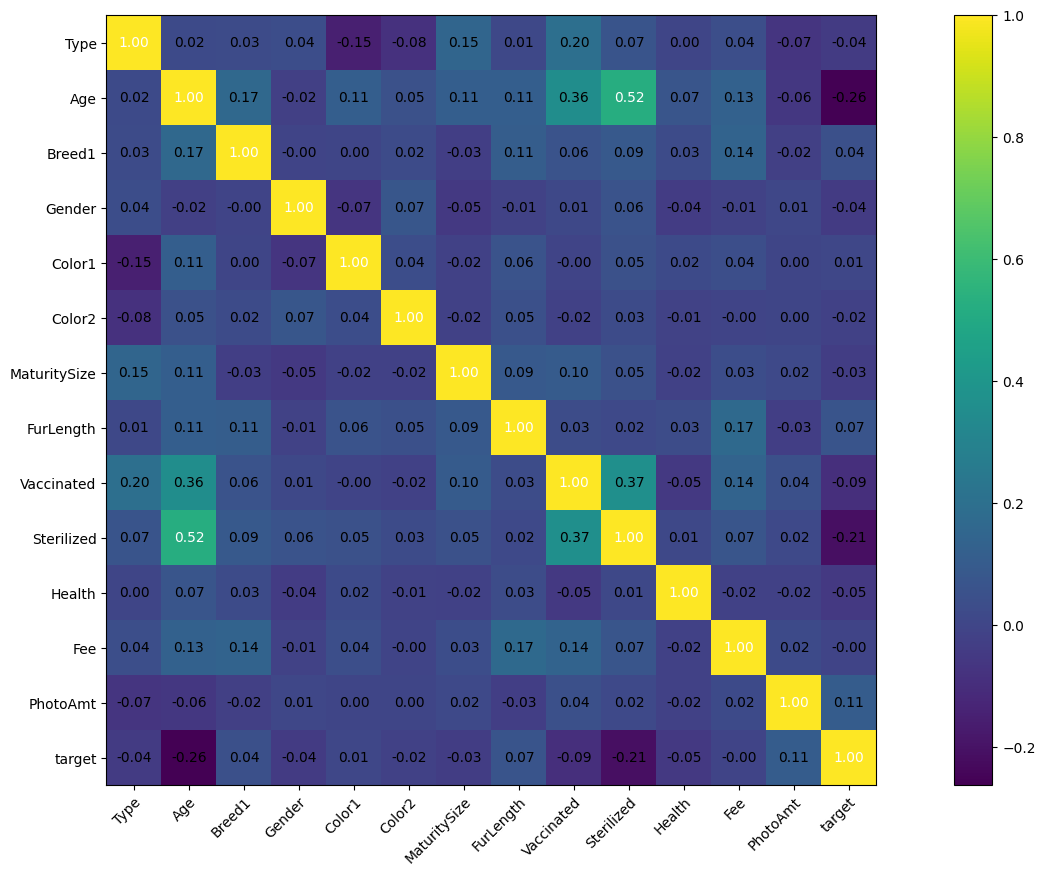

In [213]:
# Update headers_list to match the transformed dataset columns
headers_list = pet_data_transformed.columns.values.tolist()
cm = np.corrcoef(   pet_data_transformed[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()

In [214]:
## Convert Pandas to Numpy
pet_data_transformed = pet_data_transformed[headers_list]
pet_data_transformed_np = pet_data_transformed.to_numpy()

In [215]:
pet_data_transformed_np

array([[  0,   2,   0, ..., 100,   1,   1],
       [  0,   0,   1, ...,   0,   2,   1],
       [  1,   0,   2, ...,   0,   7,   1],
       ...,
       [  1,   5,  14, ...,   0,   1,   1],
       [  0,   5,   3, ...,   0,   3,   0],
       [  1,   0,   2, ...,   0,   1,   1]])

In [216]:
pet_data_transformed_np.shape

(11537, 14)

In [217]:
X = pet_data_transformed_np[:, :-1]


y = pet_data_transformed_np[:, 13:14]

In [218]:
print(X.shape)
print(y.shape)

(11537, 13)
(11537, 1)


In [219]:
# As an int since they are going to be classes
y = y.astype(int)

In [220]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [221]:
# In classification is really important the balance of classes that we have
# Pytorch doesnt like gaps
the_set = np.unique(y)

the_set

array([0, 1])

In [222]:
# 7 classes is a lot for classeification and even worse if it is inbalanced
len(  the_set  )

2

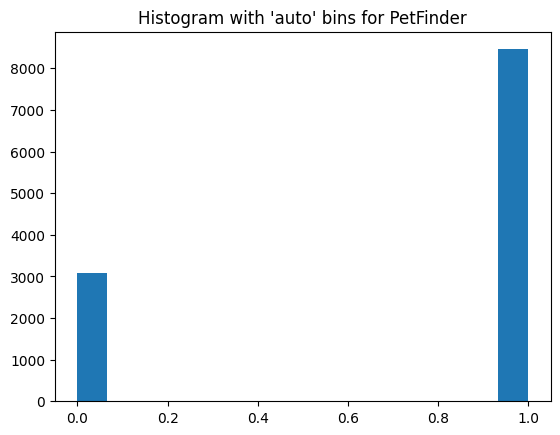

In [223]:
_ = plt.hist(y, bins='auto')

plt.title("Histogram with 'auto' bins for PetFinder")

plt.show()

# Highly inbalance dataset - this is what real world looks like
# we can combine 5 of them into a group and the other 5 into another
# we are staying with all the classes to see how bad it is

In [224]:
print(X.shape)

print(y.shape)

(11537, 13)
(11537, 1)


In [225]:
random_seed = int( 11)     ## 42


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [227]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9229, 13)
(2308, 13)
(9229, 1)
(2308, 1)


In [228]:
# Balance the training data to have equal numbers of positive and negative samples
from sklearn.utils import resample

# Flatten y_train for easier indexing
y_train_flat = y_train.flatten()

# Separate majority and minority classes
# Find indices for each class
class_0_indices = np.where(y_train_flat == 0)[0]  # Not adopted (minority)
class_1_indices = np.where(y_train_flat == 1)[0]  # Adopted (majority)

print(f"Before balancing:")
print(f"  Class 0 (Not Adopted): {len(class_0_indices)} samples")
print(f"  Class 1 (Adopted): {len(class_1_indices)} samples")

# Determine the target size (use the smaller class size)
min_class_size = min(len(class_0_indices), len(class_1_indices))
print(f"\nTarget size for each class: {min_class_size}")

# Undersample the majority class to match minority class size
if len(class_1_indices) > len(class_0_indices):
    # Randomly sample from majority class
    np.random.seed(random_seed)
    class_1_sampled = np.random.choice(class_1_indices, size=min_class_size, replace=False)
    # Keep all minority class samples
    class_0_sampled = class_0_indices
else:
    # If class 0 is majority (unlikely but handle it)
    np.random.seed(random_seed)
    class_0_sampled = np.random.choice(class_0_indices, size=min_class_size, replace=False)
    class_1_sampled = class_1_indices

# Combine the balanced indices
balanced_indices = np.concatenate([class_0_sampled, class_1_sampled])
np.random.seed(random_seed)
np.random.shuffle(balanced_indices)  # Shuffle to mix classes

# Create balanced datasets
X_train_balanced = X_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

print(f"\nAfter balancing:")
print(f"  X_train_balanced shape: {X_train_balanced.shape}")
print(f"  y_train_balanced shape: {y_train_balanced.shape}")
print(f"  Class 0 count: {np.sum(y_train_balanced == 0)}")
print(f"  Class 1 count: {np.sum(y_train_balanced == 1)}")

# Replace original training data with balanced data
X_train = X_train_balanced
y_train = y_train_balanced


Before balancing:
  Class 0 (Not Adopted): 2469 samples
  Class 1 (Adopted): 6760 samples

Target size for each class: 2469

After balancing:
  X_train_balanced shape: (4938, 13)
  y_train_balanced shape: (4938, 1)
  Class 0 count: 2469
  Class 1 count: 2469


In [229]:
X_test.dtype

dtype('int64')

In [230]:
y_test.dtype

dtype('int64')

In [231]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long
y_test  = y_test.astype(   np.int64 )

In [232]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [233]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [234]:
x_means

tensor([[ 0.5816,  3.1584,  9.4218,  0.5701,  1.3431,  1.8388,  0.8858,  0.4595,
          0.4514,  0.6748,  0.0490, 22.6555,  3.4510]])

In [235]:
x_deviations

tensor([[ 0.4934,  1.9138, 19.6877,  0.4952,  1.7755,  1.6229,  0.5356,  0.5986,
          0.4978,  0.8718,  0.2314, 75.6528,  3.0928]])

In [236]:
X_train.shape[0]

4938

In [237]:
## label_map = {0:0, 2:1 }
## the_set = array([ 3,   4,   5,   6,   7,   8,   9   ])

label_map         = { 3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6 }
reverse_label_map = { 0:3, 1:4, 2:5, 3:6, 4:7, 5:8, 6:9 }

In [238]:
# There are 2 types of creating the data set, like this and like we did in the iris dataset

pet_train_list = [  ( X_train_tr[i], y_train_tr[i])  for i in range( X_train.shape[0] ) ]

pet_test_list  = [  ( X_test_tr[i],  y_test_tr[i] )  for i in range( X_test.shape[0] ) ]

In [239]:
pet_train_list[:20]

[(tensor([0., 2., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3.]), tensor([0])),
 (tensor([1., 2., 2., 1., 1., 0., 1., 0., 1., 0., 0., 0., 3.]), tensor([1])),
 (tensor([1., 5., 2., 1., 0., 2., 1., 1., 0., 1., 0., 0., 0.]), tensor([0])),
 (tensor([1., 5., 2., 1., 1., 4., 1., 0., 1., 2., 0., 0., 3.]), tensor([0])),
 (tensor([ 1.,  5.,  2.,  0.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,  0., 10.]),
  tensor([1])),
 (tensor([ 0.,  5., 19.,  0.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]),
  tensor([1])),
 (tensor([1., 5., 2., 0., 0., 1., 1., 1., 0., 0., 0., 0., 7.]), tensor([0])),
 (tensor([  1.,   5.,   8.,   1.,   1.,   0.,   1.,   0.,   1.,   2.,   0., 300.,
            4.]),
  tensor([0])),
 (tensor([1., 2., 2., 0., 1., 4., 1., 0., 0., 2., 0., 0., 8.]), tensor([1])),
 (tensor([1., 2., 2., 0., 1., 2., 1., 1., 0., 1., 0., 0., 5.]), tensor([1])),
 (tensor([1., 1., 2., 1., 1., 2., 1., 0., 0., 0., 0., 0., 4.]), tensor([0])),
 (tensor([ 1.,  5.,  2.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  0., 80.,  2.]

In [240]:
train_dl = torch.utils.data.DataLoader(pet_train_list, batch_size=batch_size, shuffle=True)


In [241]:
X_test.shape[0]


2308

In [242]:
all_test_data = X_test.shape[0]

# In the test part we dont use batches since the test set is small enough to calculate it in one go
# -------------------------- WARNING HE WILL BE LOOKING FOR THIS --------------------------

test_dl  = torch.utils.data.DataLoader(pet_test_list,  batch_size=all_test_data, shuffle=True)

In [243]:
train_dl

In [244]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(13, 5)
        self.act1    = nn.ReLU()   ## nn.Sigmoid()
        self.linear2 = nn.Linear(5, 2)  # Changed from 7 to 2 for binary classification
        self.act2    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)


    ## perform inference
    def forward(self, x):

        x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        ## x      = self.dropout(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)

        return y_pred

In [245]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            yb = torch.squeeze(yb, dim=1)

            y_pred = model(xb)
            ## print(    yb.shape   )
            ## print( y_pred.shape  )
            loss   = loss_fn(y_pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

        if epoch % 50 == 0:
            print(epoch, "loss=", loss)



In [246]:
model      = MLP_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
# We have MSI and crossentropy
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(0.6017, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.7172, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.6133, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.4312, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.4704, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.8290, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.6410, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.5362, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.5568, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.5347, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.7349, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.7477, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.7863, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.8264, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.6102, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.5714, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.5826, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.8401, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.4593, grad_fn=<NllLossBackward

In [247]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [248]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        y_pred = model(  x_real  ) # (1000, 7)
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.67
Confusion Matrix:
[[ 402  209]
 [ 558 1139]]
Precision: 0.732
Recall: 0.668
F1-measure: 0.686


In [249]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):

    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(13, 15)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(15, 9)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(9, 2)
        self.act3    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.dropout(x)
        x      = self.linear2(x)
        x      = self.act2(x)
        x      = self.dropout(x)
        x      = self.linear3(x)
        y_pred = self.act3(x)

        return y_pred

In [250]:
model      = DL_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(0.7055, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.5192, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.5418, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.7147, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.5134, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.4198, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.6131, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.7796, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.6568, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.8283, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.4740, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.7533, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.6947, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.6694, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.5319, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.4018, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.6207, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.6554, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.5731, grad_fn=<NllLossBackward

In [251]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.64
Confusion Matrix:
[[ 438  173]
 [ 664 1033]]
Precision: 0.735
Recall: 0.637
F1-measure: 0.659


In [252]:
# Export MLP_Net model to ONNX format for deployment
import os
import torch.onnx

# Set model to evaluation mode (important for ONNX export)
model.eval()

# Get the current working directory (where the notebook is located)
# In Jupyter, this will be the directory containing the notebook
notebook_dir = os.getcwd()

# Create a dummy input with the correct shape (batch_size=1, num_features=13)
# This represents a single sample with 13 features
dummy_input = torch.randn(1, 13, dtype=torch.float32)

# Define the output path for the ONNX model
onnx_model_path = os.path.join(notebook_dir, 'mlp_net_model.onnx')

# Export the model to ONNX
try:
    torch.onnx.export(
        model,                          # Model to export
        dummy_input,                    # Dummy input (used to trace the model)
        onnx_model_path,               # Output file path
        export_params=True,             # Store trained parameter weights
        opset_version=11,               # ONNX opset version (11 is widely supported)
        do_constant_folding=True,       # Optimize constant folding
        input_names=['input'],          # Input tensor name
        output_names=['output'],        # Output tensor name
        dynamic_axes={
            'input': {0: 'batch_size'},  # Allow variable batch size
            'output': {0: 'batch_size'}
        }
    )
    print(f"✓ Model successfully exported to: {onnx_model_path}")
    print(f"  Input shape: {dummy_input.shape}")
    print(f"  Model is ready for deployment!")
    
    # Verify the export by checking if file exists
    if os.path.exists(onnx_model_path):
        file_size = os.path.getsize(onnx_model_path) / 1024  # Size in KB
        print(f"  File size: {file_size:.2f} KB")
    
except Exception as e:
    print(f"✗ Error exporting model: {str(e)}")
    print("  Make sure the model is trained and in eval mode.")


✓ Model successfully exported to: /Users/blasmorenolaguna/Documents/TODO/Coding/ClassificationAndRegression/classification/mlp_net_model.onnx
  Input shape: torch.Size([1, 13])
  Model is ready for deployment!
  File size: 2.68 KB


/var/folders/m2/93__3hzx47j742lp_6ngc_tm0000gn/T/ipykernel_23275/4233490694.py:21: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(
